In [30]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, mean_squared_error

In [31]:
# Define image dimensions for preprocessing.
height = 300
width = 300

In [32]:
# Define directories for training, validation, and test data.
train_dir = "Dataset(500)\Training"
validation_dir = "Dataset(500)\Validation"
test_dir = "Dataset(500)\Testing"


In [33]:
# Number of batches for data generators.
batch_size = 4

In [34]:
# Data augmentation for training images.
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, rotation_range=90,
                                   horizontal_flip=True, vertical_flip=True)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(height, width),
                                                    batch_size=batch_size, class_mode='binary')


Found 50 images belonging to 2 classes.


In [35]:
# Data augmentation for validation images.
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, rotation_range=90,
                                        horizontal_flip=True, vertical_flip=True)
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(height, width),
                                                              batch_size=batch_size, class_mode='binary')

Found 32 images belonging to 2 classes.


In [36]:
# Data augmentation for test images.
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, rotation_range=90,
                                  horizontal_flip=True, vertical_flip=True)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(height, width),
                                                  batch_size=batch_size, class_mode='binary')

Found 4 images belonging to 2 classes.


In [37]:
# Load ResNet50 model without top layer.
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(height, width, 3))

In [38]:
# Add custom top layers for classification.
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

In [39]:
# Combine base model with custom top layers
finetune_model = Model(inputs=base_model.input, outputs=predictions)

In [40]:
# Freeze layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [41]:
# Compile the model
finetune_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [42]:
# Checkpoint and early stopping
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max', restore_best_weights=True)

In [43]:
# Train the model on training data with validation on validation data.
history = finetune_model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=50,
                             validation_data=validation_generator, validation_steps=len(validation_generator),
                             callbacks=[checkpoint, early_stop])

C:\Users\ms036\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.4281 - loss: 64.3669
Epoch 1: val_accuracy improved from -inf to 0.53125, saving model to best_model.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 150s 11s/step - accuracy: 0.4289 - loss: 65.0659 - val_accuracy: 0.5312 - val_loss: 65.6066
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5624 - loss: 78.2981
Epoch 2: val_accuracy improved from 0.53125 to 0.81250, saving model to best_model.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 121s 9s/step - accuracy: 0.5666 - loss: 79.0596 - val_accuracy: 0.8125 - val_loss: 46.3610
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5807 - loss: 130.5691
Epoch 3: val_accuracy improved from 0.81250 to 0.87500, saving model to best_model.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 128s 9s/step - accuracy: 0.5806 - loss: 128.1277 - val_accuracy: 0.8750 - val_loss: 6.7099
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.5962 - loss: 80.3666
Epoch 4: val_accuracy did not improve from 0.87500
13/13 ━━━━━━━━━━━━━━━━━━━━ 144s 10s/step - accuracy: 0.5965 - loss: 80.7712 - val_accuracy: 0.5938 - val_loss: 107.0060
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.5161 - loss: 127.2606
Epoch 5: val_accuracy improved from 0.87500 to 0.96875, saving model to best_model.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 150s 12s/step - accuracy: 0.5235 - loss: 124.4379 - val_accuracy: 0.9688 - val_loss: 4.2984
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7493 - loss: 64.0564
Epoch 6: val_accuracy did not improve from 0.96875
13/13 ━━━━━━━━━━━━━━━━━━━━ 84s 5s/step - accuracy: 0.7487 - loss: 64.0173 - val_accuracy: 0.9375 - val_loss: 13.9917
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7417 - loss: 44.6800
Epoch 7: val_accuracy did not improve from 0.96875
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.7459 - loss: 43.6707 - val_accuracy: 0.9062 - val_loss: 14.5630
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5966 - loss: 63.6028
Epoch 8: val_accuracy did not improve from 0.96875
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.6025 - loss: 62.5805 - val_accuracy: 0.7188 - val_loss: 41.8631
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8490 - loss: 46.6903
Epoch 9: val_accuracy did not improve fro

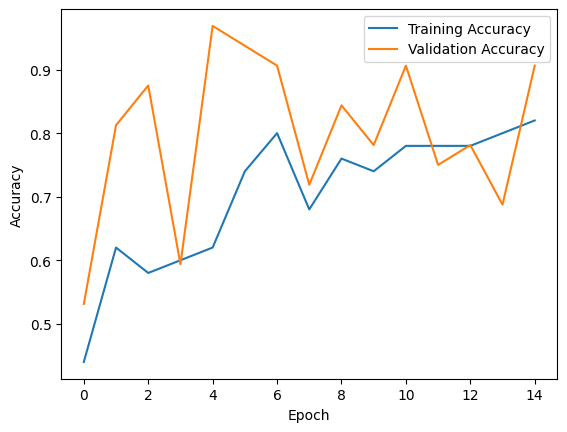

In [44]:
# Plot training and validation accuracy over epochs.
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

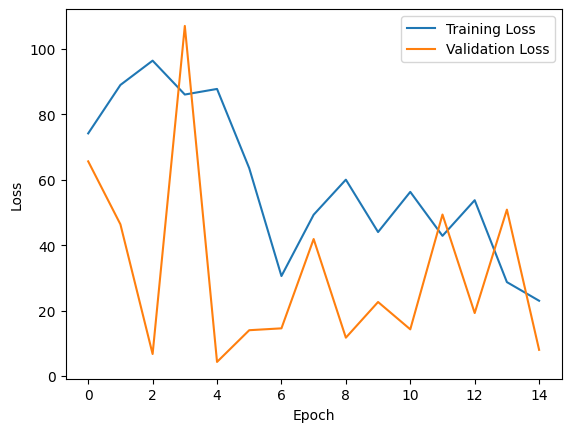

In [45]:
# Plot training and validation loss over epochs.
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
# Testing the model
def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=(height, width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.9:
        return "Real"
    else:
        return "Fake"

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


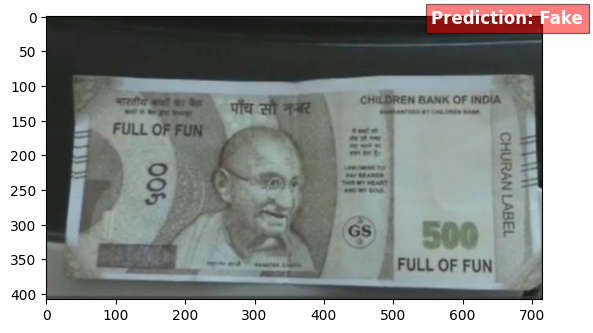

Prediction: Fake


In [47]:
# Specify the image path
test_img_path = r"Dataset(500)\Testing\Fake\Fake 1.jpeg"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10,f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


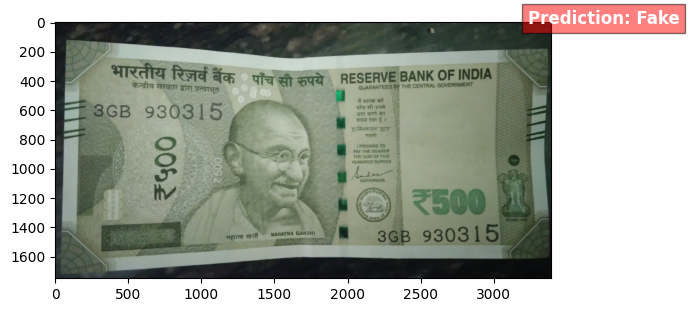

Prediction: Fake


In [48]:
# Specify the image path
test_img_path = r"Dataset(500)\Testing\Real\Real 1.jpg"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10,f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


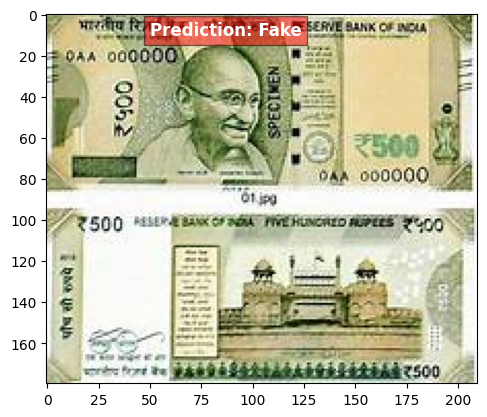

Prediction: Fake


In [49]:
# Specify the image path
test_img_path = r"Dataset(500)\Testing\Fake\fake 2.jpg"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10,f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


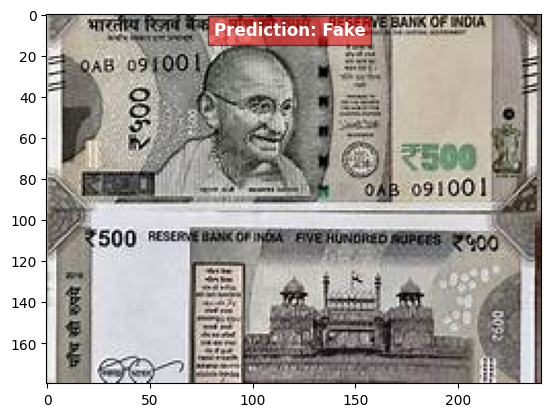

Prediction: Fake


In [50]:
# Specify the image path
test_img_path = r"Dataset(500)\Testing\Real\Real 2.jpg"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10,f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)


In [51]:
# Calculate overall accuracy of the model on the validation set.
overall_accuracy = finetune_model.evaluate(validation_generator, steps=len(validation_generator), verbose=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 562ms/step - accuracy: 0.8190 - loss: 8.5217


In [52]:
# Print overall accuracy.
print("Validation Accuracy:", overall_accuracy[1])

Validation Accuracy: 0.84375


In [53]:
# Calculate overall accuracy of the model on the training set.
overall_accuracy_training = finetune_model.evaluate(train_generator, steps=len(train_generator), verbose=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 594ms/step - accuracy: 0.8817 - loss: 18.8938


In [54]:
# Print overall accuracy on training set.
print("Overall Accuracy on Training Set:", overall_accuracy_training[1])

Overall Accuracy on Training Set: 0.8999999761581421


In [55]:
# Predict the whole validation set
validation_generator_predict = validation_datagen.flow_from_directory(validation_dir, target_size=(height, width),
                                                                      batch_size=batch_size, class_mode='binary', shuffle=False)
validation_generator_predict.reset()
predictions = finetune_model.predict(validation_generator_predict, steps=len(validation_generator_predict), verbose=1)
predicted_classes = (predictions > 0.5).astype(int)
true_classes = validation_generator_predict.classes

Found 32 images belonging to 2 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 598ms/step


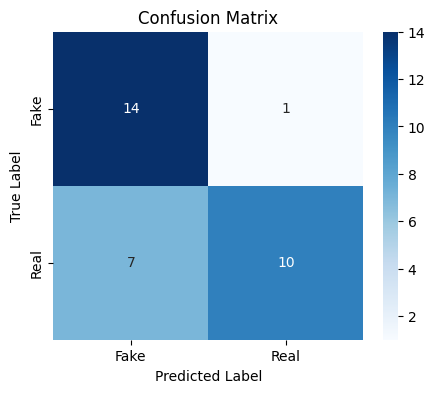

In [56]:
# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [57]:
# Mean Squared Error
mse = mean_squared_error(true_classes, predicted_classes)
print(f"Mean Squared Error: {mse*100}")

Mean Squared Error: 25.0


In [58]:
finetune_model.save("model_500rs.keras")